### Iris Dataset

In [1]:
path = r"/workspaces/Iris-Streamlit-Depployment/notebook/iris.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(path)

### basic dara quality checks

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.shape

(150, 5)

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1)

In [13]:
df.drop_duplicates(keep = False, ignore_index = True, inplace = True)

In [14]:
df.shape

(148, 5)

### seperation of x and y

In [15]:
x = df.drop("species", axis = 1)
y = df["species"]

In [16]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### create pipeline

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.15, random_state = 5)

In [27]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(125, 4) (125,)
(23, 4) (23,)


In [29]:
a = y.value_counts()
a

species
setosa        50
versicolor    50
virginica     48
Name: count, dtype: int64

<Axes: xlabel='species'>

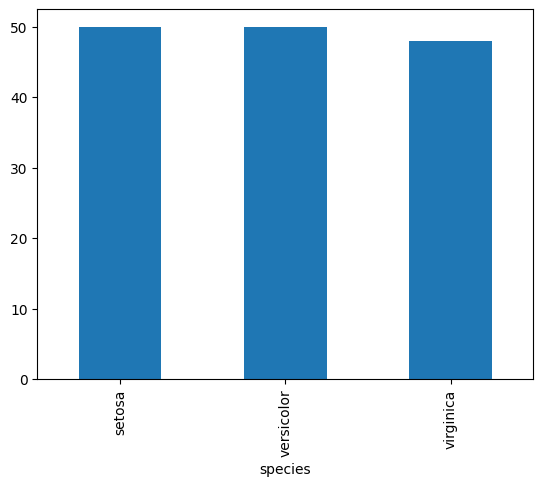

In [49]:
a.plot(kind = "bar")

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [34]:
model = Pipeline(steps = 
[('imputer', SimpleImputer(strategy ='mean')),
('scaler', StandardScaler()),
('model', LogisticRegression())])

In [35]:
model.fit(x_train,y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [37]:
model.score(x_train, y_train)

0.96

In [38]:
from sklearn.model_selection import cross_val_score

In [46]:
cv = cross_val_score(model, x_train, y_train, cv = 5, n_jobs = -1)

In [47]:
cv

array([0.92, 0.96, 1.  , 0.96, 0.92])

In [ ]:
cv.mean()

In [42]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [43]:
train_pred = model.predict(x_train)

In [44]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.93      0.95      0.94        43
   virginica       0.95      0.93      0.94        40

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125



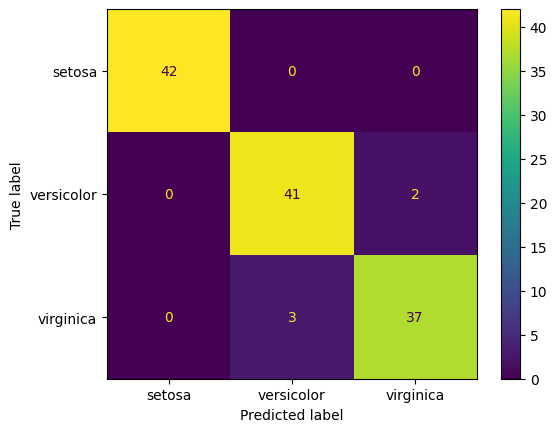

In [45]:
ConfusionMatrixDisplay.from_estimator(model, x_train, y_train)

In [48]:
test_pred = model.predict(x_test)

In [50]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.86      0.92         7
   virginica       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23



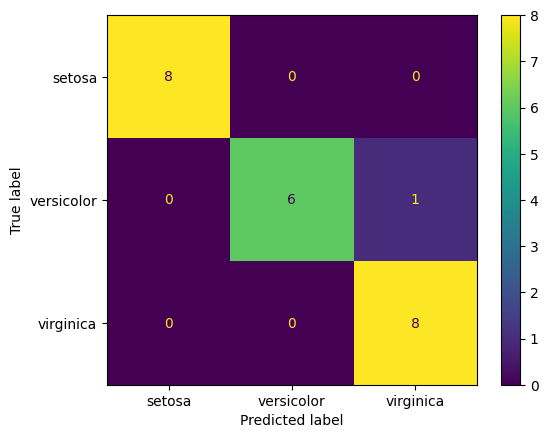

In [51]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [52]:
## save this model using joblib library

In [53]:
import joblib

In [58]:
joblib.dump(model, "Iris_model.joblib")

['Iris_model.joblib']

In [59]:
m = joblib.load("Iris_model.joblib")

In [61]:
m.score(x_train,y_train)

0.96

In [63]:
m.predict(x_train)

array(['versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa'